# MOWNIT Lab 1 Ćw 13
Jakub Karbowski

In [1]:
using Plots
using Interact
using DataFrames

WebIO._IJuliaInit()

## Wizualizacja funkcji i jej pochodnej

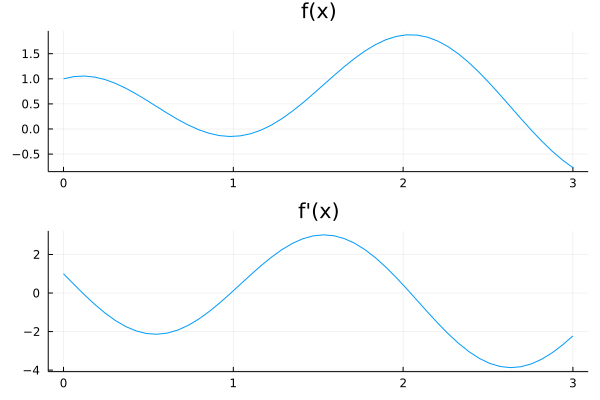

In [2]:
f(x) = sin(x) + cos(3x)
df(x) = cos(x) - 3sin(3x)

plot(
    range(0, 3, length=50),
    [f, df],
    label=false,
    layout=(2, 1),
    title=["f(x)" "f'(x)"],
)

## Dokładna wartość pochodnej

In [3]:
df(1)

0.11694228168853815

## Dokładność dostępnych typów

In [4]:
# Epsilon maszynowy
@show eps(df(Float16(1)))
@show eps(df(Float32(1)))
@show eps(df(Float64(1)))
# Wartość pochodnej w 1
@show df(Float16(1))
@show df(Float32(1))
@show df(Float64(1))
;

eps(df(Float16(1))) = Float16(6.104e-5)
eps(df(Float32(1))) = 7.450581f-9
eps(df(Float64(1))) = 1.3877787807814457e-17
df(Float16(1)) = Float16(0.1172)
df(Float32(1)) = 0.11694229f0
df(Float64(1)) = 0.11694228168853815


## Funkcja do przybliżania pochodnej

In [5]:
diff(h::T) where T = (f(T(1) + h) - f(T(1))) / h
n = 0:40
h(::Type{T}) where T = @. T(2)^-n
;

## Wizualizacja wpływu $h$ na pochodną
Opcje:
- ```zoom``` - sterowanie skalą wykresu
- ```f16``` - włącz/wyłącz pokazywanie wyników dla ```Float16```
- ```f32``` - włącz/wyłącz pokazywanie wyników dla ```Float32```
- ```f64``` - włącz/wyłącz pokazywanie wyników dla ```Float64```
- ```h_plus_one``` - dodaj 1 do wartości $h$

In [6]:
@manipulate for zoom=0:0.1:10, f16=true, f32=true, f64=true, h_plus_one=false
    h_f16 = h(Float16) .+ (h_plus_one ? 1 : 0)
    h_f32 = h(Float32) .+ (h_plus_one ? 1 : 0)
    h_f64 = h(Float64) .+ (h_plus_one ? 1 : 0)

    df_f16 = diff.(h_f16)
    df_f32 = diff.(h_f32)
    df_f64 = diff.(h_f64)
    
    plot([0, 2], x -> df(1), xlabel="h", ylabel="f'(1)", label="Real", xlims=(0, 2/10.0^zoom))

    f16 && scatter!(h_f16, df_f16, label="Float16")    
    f32 && scatter!(h_f32, df_f32, label="Float32")
    f64 && scatter!(h_f64, df_f64, label="Float64")
    
    plot!()
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["zoom"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016ba03dc0, Task (runnable) @0x000000016ba03dc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",\"2.8\",\"2.9\",\"3.0\",\"3.1\",\"3.2\",\"3.

## Wizualizacja przybliżania pochodnej
Na wykresie widzimy jakim odcinkiem przybliżana jest pochodna.

In [7]:
@manipulate for dx=range(0, 2, length=100)
    x1 = 1
    x2 = 1 + dx
    
    y1 = f(x1)
    y2 = f(x2)
    
    plot(f, label="f(x)", xlims=(0, 3), title="h = $(round(dx, digits=2))")
    plot!([x1, x2], [y1, y2], label=false)
    scatter!([x1, x2], [y1, y2], label=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["dx"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016fd09270, Task (runnable) @0x000000016fd09270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.020202\",\"0.040404\",\"0.0606061\",\"0.0808081\",\"0.10101\",\"0.121212\",\"0.141414\",\"0.161616\",\"0.181818\",\"0.20202\",\"0.222222\",\"0.242424\",\"0.262626\",\"0.282828\",\"0.30303\",\"0.323232\",\"0.343434\",\"0.363636\",\"0.383838\",\"0.40404\",\"0.

## Pochodna obustronna

In [8]:
@manipulate for dx=range(0, 2, length=100)
    x1 = 1 - dx/2
    x2 = 1 + dx/2
    
    y1 = f(x1)
    y2 = f(x2)
    
    plot(f, label="f(x)", xlims=(-1, 3), title="h = $(round(dx, digits=2))")
    plot!([x1, x2], [y1, y2], label=false)
    scatter!([x1, x2], [y1, y2], label=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["dx"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016d38f0a0, Task (runnable) @0x000000016d38f0a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.020202\",\"0.040404\",\"0.0606061\",\"0.0808081\",\"0.10101\",\"0.121212\",\"0.141414\",\"0.161616\",\"0.181818\",\"0.20202\",\"0.222222\",\"0.242424\",\"0.262626\",\"0.282828\",\"0.30303\",\"0.323232\",\"0.343434\",\"0.363636\",\"0.383838\",\"0.40404\",\"0.

## Małe wartości $h$
Jak zachowuje się pochodna dla $h\to 0^+$?

In [9]:
df(1)

0.11694228168853815

In [10]:
count = 25
DataFrame(
    h=h(Float64)[end-count:end],
    df_64=diff.(h(Float64)[end-count:end]),
    df_32=diff.(h(Float32)[end-count:end]),
    df_16=diff.(h(Float16)[end-count:end]),
)

,h,df_64,df_32,df_16
,Float64,Float64,Float32,Float16
1,3.05176e-5,0.117065,0.117188,0.0
2,1.52588e-5,0.117004,0.121094,0.0
3,7.62939e-6,0.116973,0.125,0.0
4,3.8147e-6,0.116958,0.125,0.0
5,1.90735e-6,0.11695,0.125,0.0
6,9.53674e-7,0.116946,0.125,0.0
7,4.76837e-7,0.116944,0.25,0.0
8,2.38419e-7,0.116943,0.25,0.0
9,1.19209e-7,0.116943,0.5,0.0
